A graphical model is essentially a way of representing joint probability distribution over a set of random variables in a compact and intuitive form. There are two main types of graphical models, namely directed and undirected. We generally use a directed model, also known as a Bayesian network, when we mostly have a causal relationship between the random variables. Graphical models also give us tools to operate on these models to find conditional and marginal probabilities of variables, while keeping the computational complexity under control. 

In [ ]:
ppl real world
https://www.youtube.com/watch?v=5f-9xCuyZh4

In [1]:
import pgmpy

# Representing independencies using pgmpy

Two classes for representing independencies 1) IndependenceAssertion 2) Independencies. 

IndependenceAssertion class is used to represent individual assertions of te form  (X _|_Y) or (X _|_ Y | Z)

In [2]:
from pgmpy.independencies import IndependenceAssertion

assertion1 = IndependenceAssertion('X', 'Y')
assertion1

(X _|_ Y)

In [3]:
assertion2 = IndependenceAssertion('X', 'Y', 'Z')
assertion2

(X _|_ Y | Z)

In [8]:
assertion3 = IndependenceAssertion('X', 'Y', 'Z')
assertion3

(X _|_ Y | Z)

In [9]:
from pgmpy.independencies import Independencies

independencies = Independencies()
independencies.get_assertions()

[]

In [10]:
independencies.add_assertions(assertion1, assertion2)
independencies.get_assertions()

[(X _|_ Y), (X _|_ Y | Z)]

# Representing joint probability distributions using pgmpy

In [25]:
 from pgmpy.factors.discrete import JointProbabilityDistribution  
distribution = JointProbabilityDistribution(['coin1', 'coin2'],
                     [2, 2],
                     [0.25, 0.25, 0.25, 0.25])
print(distribution)

distribution.marginal_distribution(['coin1'])

print(distribution)


+----------+----------+------------------+
| coin1    | coin2    |   P(coin1,coin2) |
+==========+==========+==================+
| coin1(0) | coin2(0) |           0.2500 |
+----------+----------+------------------+
| coin1(0) | coin2(1) |           0.2500 |
+----------+----------+------------------+
| coin1(1) | coin2(0) |           0.2500 |
+----------+----------+------------------+
| coin1(1) | coin2(1) |           0.2500 |
+----------+----------+------------------+
+----------+------------+
| coin1    |   P(coin1) |
+==========+============+
| coin1(0) |     0.5000 |
+----------+------------+
| coin1(1) |     0.5000 |
+----------+------------+


In [28]:
distribution.check_independence(['coin1'], [('coin2', 1)])

True

In [ ]:
distribution.get_independence()

In [13]:
import random

success = 0
switch = 0

N = 10000

for i in range(N):
	car = random.randint(0,2)
	choice = random.randint(0,2)
	door_to_reveal = random.randint(0,2)

	while door_to_reveal == car or choice == door_to_reveal:
		door_to_reveal = random.randint(0,2)

	final_choice = 0	
	if switch == "1":
		while final_choice == choice or final_choice == door_to_reveal:
			final_choice += 1
	else:
		final_choice = choice

	success += final_choice == car

print("\nYour win rate was: ", float(success)/N, "\n")
	



Your win rate was:  0.3346 



# Bayesian model representation

C:\Users\Rahul\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Rahul\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


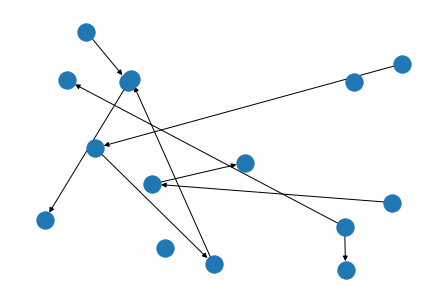

In [31]:
from pgmpy.models import BayesianModel
import networkx as nx
import pylab as plt

# Define an empty bayesian model
model = BayesianModel()

# Add a list of nodes
model.add_nodes_from([2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12, 13, 14])

model.add_edges_from([(1, 2), (1, 3), (4, 5), (6, 7), (7, 8), (8, 9), (9, 10), (19, 11), (11, 12), ])

nx.draw_random(model)

# Traffic Model Bayesian Network

0s are True cases
1s are False cases

In [72]:
from pgmpy.models import BayesianModel
import networkx as nx
import pylab as plt
from pgmpy.factors.discrete import TabularCPD

model = BayesianModel()

model.add_nodes_from(['rain', 'traffic_jam'])
model.add_edge('rain', 'traffic_jam')
model.add_edge('accident', 'traffic_jam')

model.add_node('long_queues') 
model.add_edge('traffic_jam', 'long_queues') 

model.add_nodes_from(['getting_up_late',                                 
                               'late_for_school']) 
model.add_edges_from( [('getting_up_late', 'late_for_school'),                    
                                ('traffic_jam', 'late_for_school')]) 


print(model.nodes())

print(model.edges())


['rain', 'traffic_jam', 'accident', 'long_queues', 'getting_up_late', 'late_for_school']
[('rain', 'traffic_jam'), ('traffic_jam', 'long_queues'), ('traffic_jam', 'late_for_school'), ('accident', 'traffic_jam'), ('getting_up_late', 'late_for_school')]


In [73]:
cpd_rain = TabularCPD('rain', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])

cpd_traffic_jam = TabularCPD('traffic_jam', 2 ,
                                [[0.9, 0.6, 0.7, 0.1], 
                                [0.1, 0.4, 0.3, 0.9]],
                                evidence = ['rain', 'accident'],
                                evidence_card = [2, 2])
                                
cpd_long_queues = TabularCPD('long_queues', 2,                                      
                                      [[0.9, 0.2],                                       
                                       [0.1, 0.8]],                                      
                                      evidence=['traffic_jam'],                                      
                                      evidence_card=[2]) 

cpd_getting_up_late = TabularCPD('getting_up_late', 2,                                          
                                          [[0.6], [0.4]]) 
cpd_late_for_school = TabularCPD(  'late_for_school', 2,                               
                                          [[0.9, 0.45, 0.8, 0.1],                                
                                           [0.1, 0.55, 0.2, 0.9]],                               
                                          evidence=['getting_up_late',                                         
                                                    'traffic_jam'],                               
                                          evidence_card=[2, 2]) 

model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)
model.add_cpds(cpd_long_queues) 
model.add_cpds(cpd_getting_up_late, cpd_late_for_school) 
model.get_cpds() 

[<TabularCPD representing P(rain:2) at 0x1eb9f4bbc88>,
 <TabularCPD representing P(accident:2) at 0x1eb9f4bb108>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x1eb9f4bb048>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x1eb9f3d1388>,
 <TabularCPD representing P(getting_up_late:2) at 0x1eb9ed65fc8>,
 <TabularCPD representing P(late_for_school:2 | getting_up_late:2, traffic_jam:2) at 0x1eb9f3d0308>]

In [74]:
model.check_model()

True

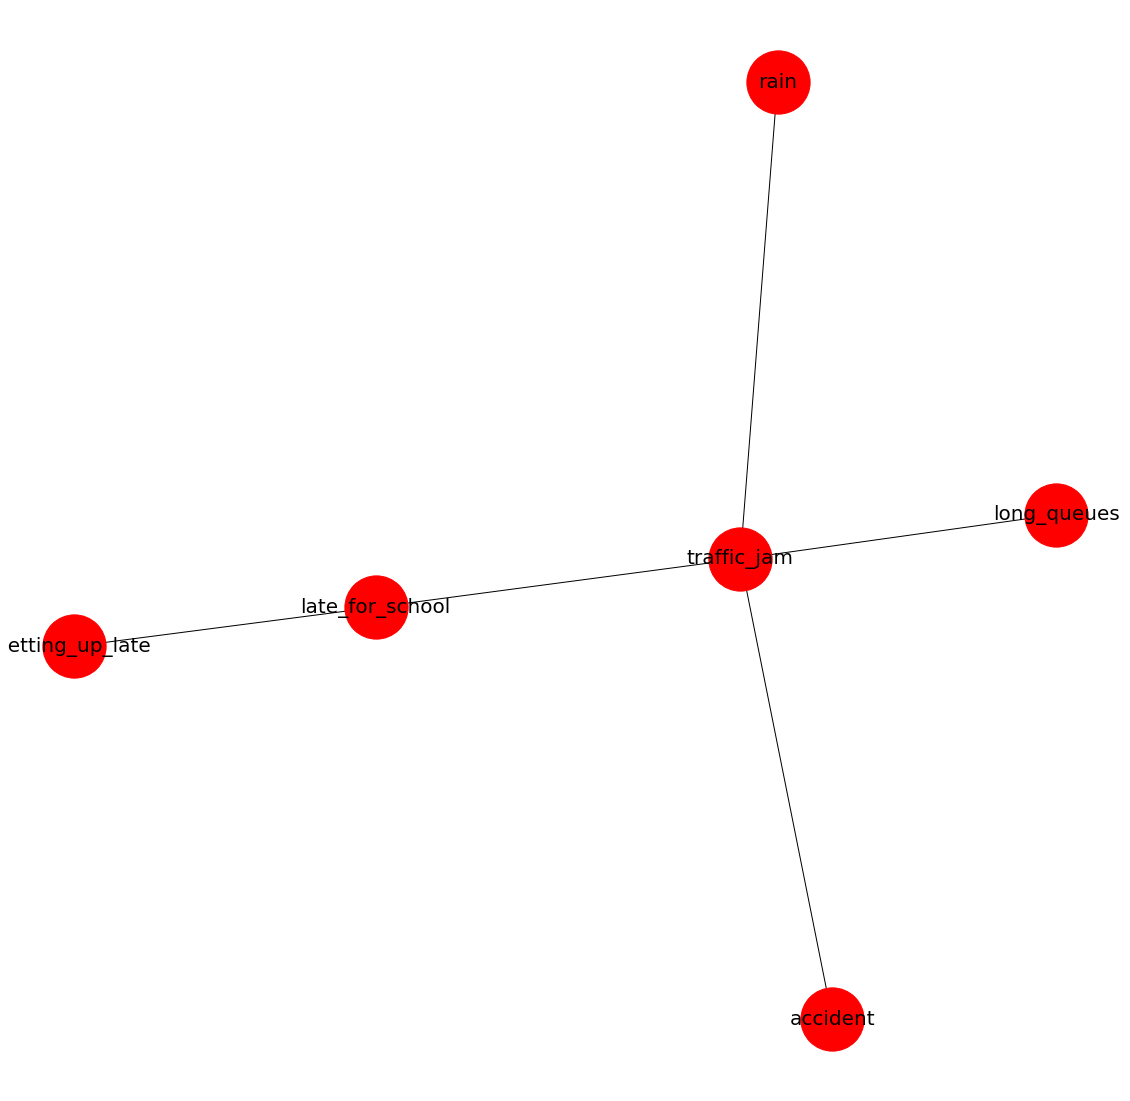

In [75]:
G = nx.Graph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)

fig, ax = plt.subplots(figsize = (20, 20))
nx.draw(G, pos, with_labels = True,
       node_size = 4000, font_size = 20,
        arrowsize = 1, node_color = 'red', ax = ax
       )
plt.show()

# Notations from the book for variables

### Traffic accident as A 
### Heavy rain as B 
### Traffic jam as J 
### Getting up late as G 
### Long queues as Q 
### Late to school as L 

In [76]:
from pgmpy.inference import VariableElimination

model_infer = VariableElimination(model)

In [82]:
model.nodes()

NodeView(('rain', 'traffic_jam', 'accident', 'long_queues', 'getting_up_late', 'late_for_school'))

In [106]:
# What is the prob of traffic jam when there is no evidence
prob = model_infer.query(variables = ['traffic_jam'])
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 403.28it/s]


+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.3960 |
+----------------+--------------------+
| traffic_jam(1) |             0.6040 |
+----------------+--------------------+


In [109]:
# Probability of traffic jam when there is an accident
prob = model_infer.query(variables = ['traffic_jam'],
                         evidence = {'accident': 0} )
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 349.25it/s]


+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.7800 |
+----------------+--------------------+
| traffic_jam(1) |             0.2200 |
+----------------+--------------------+


Prob of having traffic jam increased when accident was given evidence
Probability increased from 0.30 to 0.79


In [110]:
# Probability of traffic jam whern ther is rain and accident
prob = model_infer.query(variables = ['traffic_jam'], 
                         evidence = {'rain':0})
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 486.72it/s]


+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.6600 |
+----------------+--------------------+
| traffic_jam(1) |             0.3400 |
+----------------+--------------------+


In [114]:
# Probability of traffic jam whern ther is rain and accident
prob = model_infer.query(variables = ['traffic_jam'], 
                         evidence = {'rain': 0, 'accident': 0})
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 493.14it/s]


+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.9000 |
+----------------+--------------------+
| traffic_jam(1) |             0.1000 |
+----------------+--------------------+


In [116]:
# Probability of traffic jam whern ther is rain and accident
prob = model_infer.query(variables = ['traffic_jam'], 
                         evidence = {'rain': 0, 'accident': 0, 'long_queues': 0})
print(prob)

Eliminating: getting_up_late: 100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 551.12it/s]


+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.9759 |
+----------------+--------------------+
| traffic_jam(1) |             0.0241 |
+----------------+--------------------+


# Evidential Reasoning

If we knew that there was a traffic jam, then the chances of heavy rain would increase. This is known as evidential reasoning, where the **observation of the outcomes of the children or effect influences the probability of parents or causes.**

In [118]:
# probability of rain when there is a traffic jam
prob = model_infer.query(variables = ['rain'], 
                        evidence = {'traffic_jam': 0})
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 561.35it/s]


+---------+-------------+
| rain    |   phi(rain) |
+=========+=============+
| rain(0) |      0.6667 |
+---------+-------------+
| rain(1) |      0.3333 |
+---------+-------------+


In [120]:
# probability of accident when there is no traffic jam and rain
prob = model_infer.query(variables = ['accident'],
                        evidence = {'traffic_jam': 1, 'rain': 1})
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 542.72it/s]


+-------------+-----------------+
| accident    |   phi(accident) |
+=============+=================+
| accident(0) |          0.0769 |
+-------------+-----------------+
| accident(1) |          0.9231 |
+-------------+-----------------+


# Intercausal reasoning

Different causes with the same effect influence each other

In [121]:
prob = model_infer.query(variables = ['accident'], 
                        evidence = {'traffic_jam': 0, 'rain': 1})
print(prob)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 527.28it/s]


+-------------+-----------------+
| accident    |   phi(accident) |
+=============+=================+
| accident(0) |          0.6364 |
+-------------+-----------------+
| accident(1) |          0.3636 |
+-------------+-----------------+


In [130]:
# Let's check if probability and rain are independent of each other
prob = model_infer.query(variables = ['accident'])
print(prob)

prob1 = model_infer.query(variables = ['accident'], 
                        evidence = {'rain': 1})
print(prob1)

prob2 = model_infer.query(variables = ['accident'], 
                        evidence = {'rain': 0})
print(prob1)

Eliminating: long_queues: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 366.21it/s]


+-------------+-----------------+
| accident    |   phi(accident) |
+=============+=================+
| accident(0) |          0.2000 |
+-------------+-----------------+
| accident(1) |          0.8000 |
+-------------+-----------------+


Eliminating: traffic_jam: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 410.58it/s]


+-------------+-----------------+
| accident    |   phi(accident) |
+=============+=================+
| accident(0) |          0.2000 |
+-------------+-----------------+
| accident(1) |          0.8000 |
+-------------+-----------------+


Eliminating: traffic_jam: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 435.17it/s]


+-------------+-----------------+
| accident    |   phi(accident) |
+=============+=================+
| accident(0) |          0.2000 |
+-------------+-----------------+
| accident(1) |          0.8000 |
+-------------+-----------------+


Irrespective of having given evidence about rain. The probability of accident remain unchanged